# 1.

In [112]:
from keras.src.utils import to_categorical
from keras import Input
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from PIL import Image


In [113]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

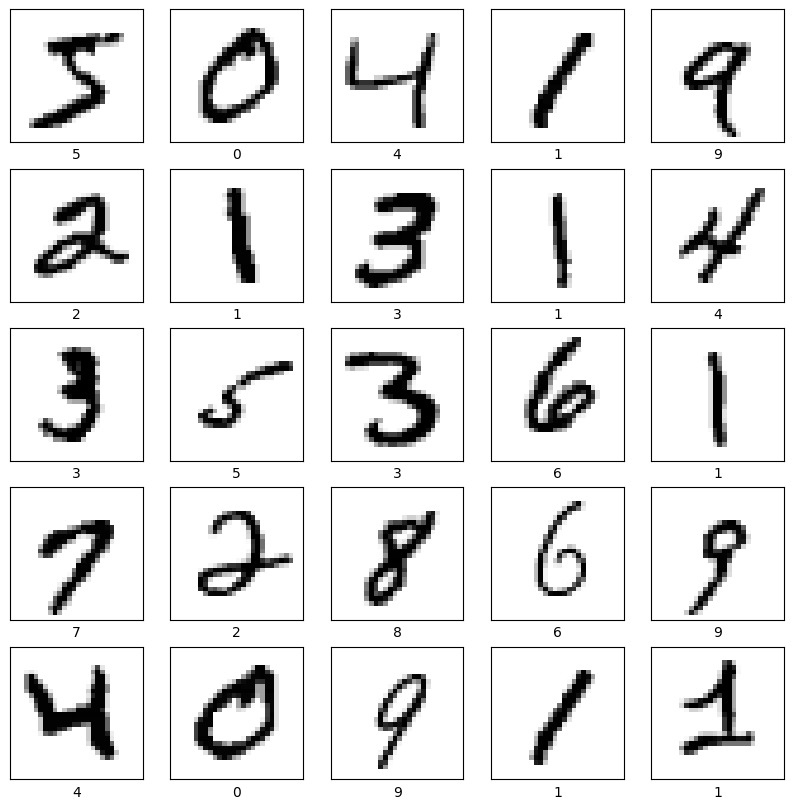

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show( )

In [115]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [116]:
from keras. utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [117]:
from keras import models
from keras import layers
# Визначення типу моделі
network = models.Sequential()
# Визначення прихованого шару
network.add(layers.Input(shape=(28*28,))) 
network.add(layers.Dense(512, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [118]:
network.compile(optimizer = 'rmsprop',
                    loss = 'categorical_crossentropy',
                    metrics = ['accuracy'])

In [119]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8690 - loss: 0.4525
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9661 - loss: 0.1147
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9774 - loss: 0.0743
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9849 - loss: 0.0523
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0373


In [120]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9744 - loss: 0.0867


In [121]:
network.save('my_model.keras')

In [122]:
json_string = network.to_json()

In [123]:
network.save_weights('my_model_weights.weights.h5')

In [124]:
from keras.models import load_model
model = load_model('my_model.keras')

In [125]:
# Список назв файлів
filenames = ['one.png','seven.png','four.png','nine.png']

for fname in filenames:
    # Завантаження зображення
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)

    # Інверсія кольорів
    img = 255 - img

    # Зміна розміру
    img = cv2.resize(img, (28, 28))

    # Нормалізація
    tst = img.reshape((1, 28 * 28)).astype('float32') / 255

    # Передбачення
    pred = list(model.predict(tst)[0])
    predicted_label = pred.index(max(pred))

    # Вивід результату
    print(f"{fname} -> Модель розпізнала як: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
one.png -> Модель розпізнала як: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
seven.png -> Модель розпізнала як: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
four.png -> Модель розпізнала як: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
nine.png -> Модель розпізнала як: 7


# 2.

## CIFAR-10

In [126]:
# Завантаження набору CIFAR-10
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

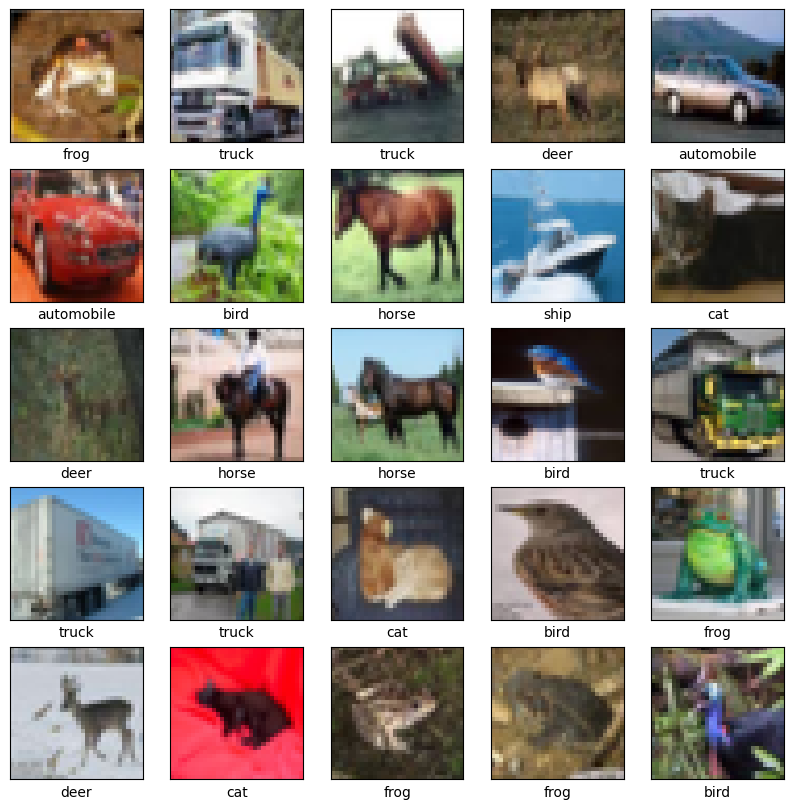

In [127]:
# Класи (мітки)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Вивід 25 зображень з мітками
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [128]:
# Нормалізація зображень (до 0-1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255


In [129]:
# Для sparse_categorical_crossentropy не потрібен one-hot encoding
# Використовуємо оригінальні мітки
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)


In [130]:
# Побудова моделі
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras import models, layers
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import BatchNormalization, Dropout

# Побудова моделі
model2 = models.Sequential([
    Input(shape=(32, 32, 3)),
    
    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [131]:
# Компіляція
# Компіляція моделі
from tensorflow.keras.optimizers import Adam

model2.compile(optimizer=Adam(learning_rate=1e-3),
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

In [132]:
# Тренування
# Callback для ранньої зупинки
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=3, restore_best_weights=True)

history = model2.fit(
    x_train, y_train,  # Використовуємо оригінальні мітки, не one-hot encoded
    epochs=20,
    batch_size=64,
    validation_data=(x_test, y_test),  # Використовуємо оригінальні мітки
    callbacks=[early_stopping]
)

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 24ms/step - accuracy: 0.3670 - loss: 1.9563 - val_accuracy: 0.5283 - val_loss: 1.3220
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.5596 - loss: 1.2352 - val_accuracy: 0.4187 - val_loss: 1.7533
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.6178 - loss: 1.0872 - val_accuracy: 0.5867 - val_loss: 1.1643
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.6485 - loss: 1.0096 - val_accuracy: 0.6355 - val_loss: 1.5114
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.6695 - loss: 0.9407 - val_accuracy: 0.6926 - val_loss: 0.8855
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 23ms/step - accuracy: 0.6840 - loss: 0.9014 - val_accuracy: 0.6748 - val_loss: 0.9372
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.6986 - loss: 0.8618 - val_accuracy: 0.6897 - val_loss: 0.8721
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.7066 - loss: 0.8374 - 

In [133]:
# Оцінка
# Оцінка моделі на тестових даних
test_loss, test_accuracy = model2.evaluate(x_test, y_test)
print(f"Точність на тестових даних: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7112 - loss: 0.8231
Точність на тестових даних: 0.7090


In [134]:
# Список назв файлів
filenames = ['cat.jpeg','bird.jpg', 'deer.jpg','frog.jpg']

for fname in filenames:
    # Завантаження зображення у кольоровому режимі (3 канали)
    img = cv2.imread(fname)

    # Зміна розміру до 32x32
    img = cv2.resize(img, (32, 32))

    # Нормалізація пікселів з діапазону 0-255 до 0-1
    img = img.astype('float32') / 255.0

    # Додавання розміру для пакетної обробки (1, 32, 32, 3)
    img = np.expand_dims(img, axis=0)

    # Передбачення
    predictions = model2.predict(img)
    predicted_label = np.argmax(predictions)

    # Виведення результату
    print(f"{fname} -> Модель розпізнала як: {class_names[predicted_label]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
cat.jpeg -> Модель розпізнала як: truck
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
bird.jpg -> Модель розпізнала як: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
deer.jpg -> Модель розпізнала як: airplane
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
frog.jpg -> Модель розпізнала як: automobile


## FMNIST

In [135]:
# Завантаження даних
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [136]:
# Назви класів
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

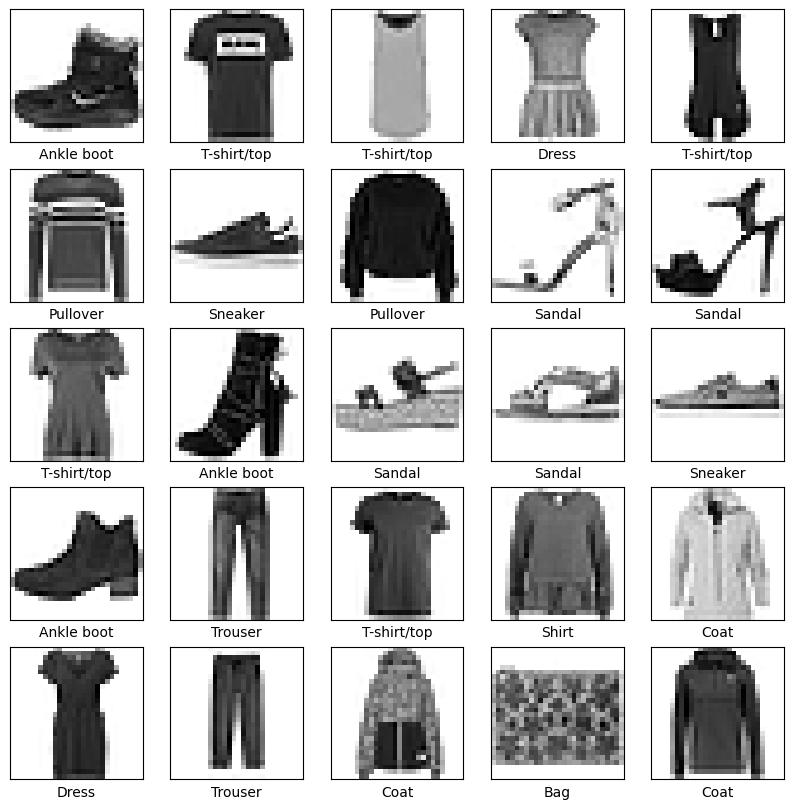

In [137]:
# Виведення 25 зображень
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [138]:
# Підготовка даних 
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255


In [143]:
# Використовуємо оригінальні мітки (не one-hot encoding)
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)


In [144]:
# Побудова моделі
model3 = models.Sequential([
    Input(shape=(28, 28, 1)),

    layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

In [145]:
# Компіляція моделі
model3.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Тренування моделі
model3.fit(x_train, y_train,  # Використовуємо оригінальні мітки
           epochs=20, 
           batch_size=64, 
           validation_data=(x_test, y_test))  # Використовуємо оригінальні мітки

Epoch 1/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.7720 - loss: 0.6597 - val_accuracy: 0.8760 - val_loss: 0.3330
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 14s 15ms/step - accuracy: 0.8767 - loss: 0.3459 - val_accuracy: 0.8967 - val_loss: 0.2866
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8932 - loss: 0.2994 - val_accuracy: 0.8839 - val_loss: 0.2991
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 18ms/step - accuracy: 0.8989 - loss: 0.2786 - val_accuracy: 0.9098 - val_loss: 0.2471
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9058 - loss: 0.2609 - val_accuracy: 0.9053 - val_loss: 0.2700
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.9088 - loss: 0.2544 - val_accuracy: 0.8846 - val_loss: 0.3279
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 19s 21ms/step - accuracy: 0.9118 - loss: 0.2440 - val_accuracy: 0.9134 - val_loss: 0.2398
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.9165 - loss: 0.2292 - 

Epoch 1/20


ValueError: Argument `output` must have rank (ndim) `target.ndim - 1`. Received: target.shape=(None, 10), output.shape=(None, 10)

In [146]:
# Оцінка
test_loss, test_acc = model3.evaluate(x_test, y_test)
print(f"Точність на тестових даних: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8429 - loss: 0.6169
Точність на тестових даних: 0.8470


In [147]:
# Файли та класи
filenames3 = ['bag.jpg', 'dress.png', 't-shirt.png']
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
for fname in filenames3:
    # Завантаження зображення в градаціях сірого
    img = cv2.imread(fname, cv2.IMREAD_GRAYSCALE)

    # Зміна розміру до 28x28 — розмір Fashion MNIST
    img_resized = cv2.resize(img, (28, 28))

    # Нормалізація пікселів (від 0 до 1)
    img_norm = img_resized.astype('float32') / 255.0

    # Перетворення на форму (1, 28, 28, 1) 
    img_input = img_norm.reshape(1, 28, 28, 1)

    # Передбачення
    predictions = model3.predict(img_input)
    predicted_label = np.argmax(predictions)

    # Вивід результату
    print(f"{fname} -> Модель розпізнала як: {class_names[predicted_label]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
bag.jpg -> Модель розпізнала як: Sandal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
dress.png -> Модель розпізнала як: Sandal
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
t-shirt.png -> Модель розпізнала як: Sandal
